## Data Information:
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn import metrics


In [3]:
header = ["letter", "rec_1", "rec_2", "rec_3", "rec_4", "rec_5", "rec_6", "rec_7", "rec_8", "rec_9", "rec_10", "rec_11", "rec_12", "rec_13", "rec_14", "rec_15", "rec_16"]
df = pd.read_csv("./Data/letter-recognition.data", names = header)

In [9]:
print(df.shape)
df.dtypes

(20000, 17)


letter    object
rec_1      int64
rec_2      int64
rec_3      int64
rec_4      int64
rec_5      int64
rec_6      int64
rec_7      int64
rec_8      int64
rec_9      int64
rec_10     int64
rec_11     int64
rec_12     int64
rec_13     int64
rec_14     int64
rec_15     int64
rec_16     int64
dtype: object

## Prep

In [87]:
col_y = "letter"

In [88]:
X = df.drop(col_y, axis="columns")
Y = df[col_y]

In [89]:
X_train, X_test      , y_train, y_test       = train_test_split(X      ,Y      , test_size=0.15)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.03)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape, X_test.shape, y_test.shape

((16490, 16), (510, 16), (16490,), (510,), (3000, 16), (3000,))

In [91]:
## Premier modèle simple (Random Forest)

r = []
for i in range(50):
    hyperparametres = {"n_estimators" : 20 , 
                       "n_jobs"       : -1 }
    algo = RandomForestClassifier(**hyperparametres)
    modele = algo.fit(X_train.select_dtypes(exclude=["object"]), y_train)
    score = modele.score(X_test, y_test)
    r.append(score)
    print(score, end=" / ")

0.956 / 0.9556666666666667 / 0.9606666666666667 / 0.956 / 0.9586666666666667 / 0.9513333333333334 / 0.9573333333333334 / 0.9513333333333334 / 0.9603333333333334 / 0.9553333333333334 / 0.9573333333333334 / 0.953 / 0.9583333333333334 / 0.9553333333333334 / 0.957 / 0.9546666666666667 / 0.952 / 0.9566666666666667 / 0.9523333333333334 / 0.9553333333333334 / 0.9573333333333334 / 0.95 / 0.956 / 0.9513333333333334 / 0.9523333333333334 / 0.953 / 0.9566666666666667 / 0.955 / 0.955 / 0.958 / 0.9546666666666667 / 0.953 / 0.955 / 0.9503333333333334 / 0.9543333333333334 / 0.9526666666666667 / 0.9536666666666667 / 0.9573333333333334 / 0.951 / 0.9523333333333334 / 0.953 / 0.9523333333333334 / 0.9496666666666667 / 0.955 / 0.9553333333333334 / 0.956 / 0.955 / 0.9546666666666667 / 0.9596666666666667 / 0.955 / 

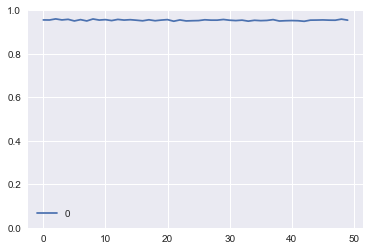

In [92]:
#Plot results
%matplotlib inline
pd.DataFrame(r).plot(ylim=[0,1])

In [93]:
#Variable Importance
list(zip(X_train.columns, modele.feature_importances_))

[('rec_1', 0.021317868330206068),
 ('rec_2', 0.024565130199856903),
 ('rec_3', 0.021902834532208888),
 ('rec_4', 0.020074453721166462),
 ('rec_5', 0.025087747773579028),
 ('rec_6', 0.054542374754675105),
 ('rec_7', 0.0714985554191115),
 ('rec_8', 0.0839441227619364),
 ('rec_9', 0.09579024328637703),
 ('rec_10', 0.06863580707761373),
 ('rec_11', 0.08840071532508717),
 ('rec_12', 0.08378664887297542),
 ('rec_13', 0.11529394430291554),
 ('rec_14', 0.07109443101927991),
 ('rec_15', 0.10003730031605587),
 ('rec_16', 0.05402782230695493)]

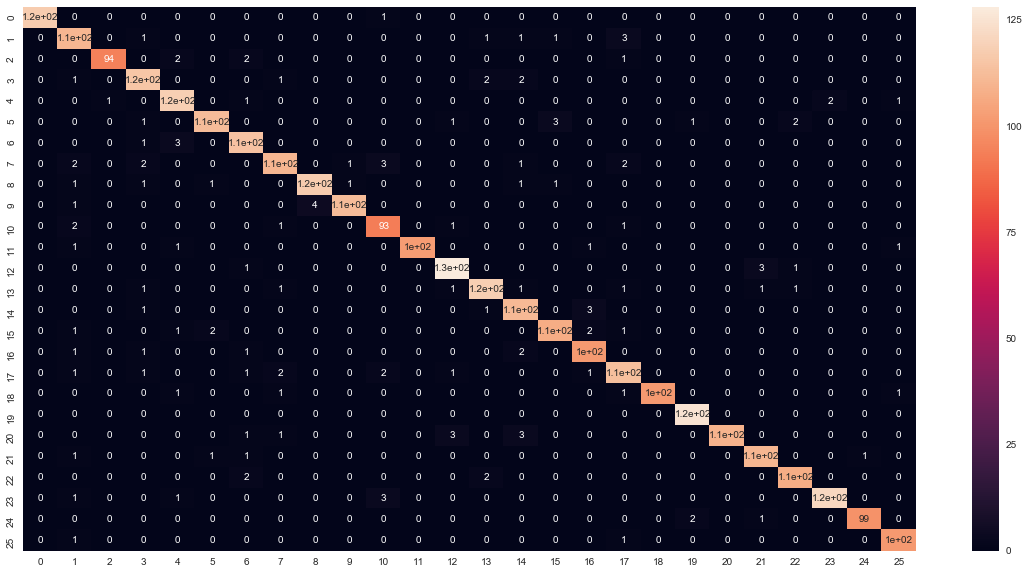

In [97]:
#Plot Confusion Matrix

y_pred = modele.predict(X_test) #Prédiction

array = confusion_matrix(y_test, y_pred) #Comparaison

df_cm = pd.DataFrame(array, range(26),
                  range(26))
plt.figure(figsize = (20,10))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size

In [98]:
y_test.shape

(3000,)

In [84]:
#ROC
#
#y = np.array([1, 1, 2, 2])
#pred = np.array([0.1, 0.4, 0.35, 0.8])
#
#y_test = np.array(y_test)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
#metrics.auc(fpr, tpr)

In [63]:
y_test

array(['O', 'P', 'I', ..., 'I', 'S', 'C'], dtype=object)

In [64]:
y_pred

array(['O', 'P', 'I', ..., 'I', 'S', 'C'], dtype=object)

## Grid Search